In [1]:
!pip install tiktoken openai pandas matplotlib plotly scikit-learn numpy

C:\Users\starl\.conda\envs\langchain\python.exe


In [1]:
import pandas as pd
import tiktoken

In [2]:
import os
path = os.path.abspath('.')
print(path)

C:\Users\starl\Company\Codes\llm-application-study\openai_api


In [9]:
input_datapath = "data/fine_food_reviews_1k.csv"
df = pd.read_csv(input_datapath, index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()

# 将Summary和Text字段组合成新的字段combined,  在Pandas中，str.strip() 函数用于去除字符串开头和结尾的空白字符（包括空格、制表符、换行符等）
df["combined"] = ("Title: " + df.Summary.str.strip() + "; Contnet: " + df.Text.str.strip())
df.head(2)

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Contnet: Not pleased...


In [11]:
df["combined"]

0      Title: where does one  start...and stop... wit...
1      Title: Arrived in pieces; Contnet: Not pleased...
2      Title: It isn't blanc mange, but isn't bad . ....
3      Title: These also have SALT and it's not sea s...
4      Title: Happy with the product; Contnet: My dog...
                             ...                        
995    Title: Delicious!; Contnet: I have ordered the...
996    Title: Good Training Treat; Contnet: My dog wi...
997    Title: Jamica Me Crazy Coffee; Contnet: Wolfga...
998    Title: Party Peanuts; Contnet: Great product f...
999    Title: I love Maui Coffee!; Contnet: My first ...
Name: combined, Length: 1000, dtype: object

Embedding 模型关键参数

In [12]:
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"
max_tokens = 8000

top_n = 1000
encoding = tiktoken.get_encoding(embedding_encoding)
print(encoding)

<Encoding 'cl100k_base'>


In [13]:
df["n_tokens"] = df.combined.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(top_n)

len(df)

1000

生成Embeddings并保存

In [16]:
from openai import OpenAI
client = OpenAI()

res = client.embeddings.create(input="abs", model = embedding_model)
print(res.data[0].embedding)
len(res.data[0].embedding)

[-0.0026922994293272495, -0.012855729088187218, 0.003496623830869794, -0.02972298488020897, -0.010479775257408619, 0.01460572425276041, -0.025778766721487045, -0.02019224502146244, 0.01264034491032362, -0.006515364162623882, 0.011361503042280674, 0.007605745457112789, -0.008393242955207825, 0.0015834085643291473, -0.0247556921094656, 0.009820161387324333, 0.036830656230449677, -0.0016540813958272338, 0.021848009899258614, -0.017594175413250923, -0.011247080750763416, 0.0017735521541908383, -0.009497085586190224, -0.009416316635906696, -0.022036470472812653, 0.007659591734409332, 0.0007483750814571977, -0.03206528350710869, 0.004496139939874411, -0.009685547091066837, 0.0074980538338422775, 0.019290324300527573, -0.008406704291701317, -0.03833834081888199, -0.028726832941174507, -0.009725931100547314, -0.01965378411114216, -0.013124959543347359, 0.014726877212524414, -0.006192288361489773, 0.019626861438155174, -0.005297098774462938, 0.0028269141912460327, -0.004704792983829975, -0.0236

1536

In [18]:
def embeding_text(text, model = "text-embedding-ada-002"):
    res = client.embeddings.create(input=text, model=model)
    return res.data[0].embedding

# 将combined文本做embedding，并保存
df["embedding"] = df.combined.apply(lambda x: embeding_text(x))
output_datapath = "data/fine_food_reviews_with_embedding_1k.csv"
df.to_csv(output_datapath)

C:\Users\starl\Company\Codes\llm-application-study\openai_api\data\fine_food_reviews_with_embedding_1k.csv


读取fine fond reviews with embedding 1k嵌入文件

In [20]:
embedding_datapath = "data/fine_food_reviews_with_embedding_1k.csv"
df_embedded = pd.read_csv(embedding_datapath, index_col=0)

df_embedded["embedding"]

0      [0.008644280023872852, -0.0233621783554554, 0....
1      [-0.025779027491807938, -0.01094140950590372, ...
2      [0.001375730847939849, 0.004610197618603706, 0...
3      [0.009143693372607231, -0.013784264214336872, ...
4      [0.014057093299925327, -0.0027385856956243515,...
                             ...                        
995    [-0.010282919742166996, -0.019557837396860123,...
996    [-0.02524563856422901, -0.01604844257235527, 0...
997    [-0.0171551201492548, -0.004444735590368509, 0...
998    [-0.010733955539762974, -0.014626193791627884,...
999    [-0.00736920116469264, -0.014842560514807701, ...
Name: embedding, Length: 1000, dtype: object

In [22]:
len(df_embedded["embedding"][0])

34418

In [23]:
type(df_embedded["embedding"][0])

str

In [24]:
df_embedded["embedding"][0]

'[0.008644280023872852, -0.0233621783554554, 0.011427449993789196, -0.014121504500508308, 0.0025483830831944942, 0.015698177739977837, -0.0006876521511003375, -0.022580696269869804, -0.021086284890770912, -0.013634791597723961, 0.015163479372859001, 0.004575778730213642, -0.034467436373233795, 0.002551810583099723, 0.016465947031974792, 0.01918056793510914, 0.017069196328520775, -0.024705776944756508, -0.021072573959827423, -0.024568675085902214, -0.04376295208930969, -0.007088172249495983, 0.019303958863019943, -0.007177288644015789, -0.010687099769711494, 0.012825890444219112, 0.02821558713912964, -0.021291937679052353, -0.009494312107563019, 0.019715264439582825, -0.00015991661348380148, 0.009178977459669113, -0.011873031966388226, -0.015040087513625622, -0.006556902080774307, -0.010467736050486565, -0.026570364832878113, 0.0037737321108579636, 0.023896874859929085, -0.022361332550644875, 0.02264924719929695, -0.013004123233258724, 0.012058119289577007, -0.0082603944465518, -0.00034

In [25]:
import ast
#将字符串转换为向量
df_embedded["embedding_vec"] = df_embedded["embedding"].apply(ast.literal_eval)
len(df_embedded["embedding_vec"][0])

1536

3. 使用t-SNE可视化1536维Embedding美食评论

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.manifold import TSNE

In [27]:
type(df_embedded["embedding_vec"])

pandas.core.series.Series

In [50]:
# 检查嵌入向量，是不是等长
assert df_embedded["embedding_vec"].apply(len).nunique() == 1

In [51]:
# 将向量列表转换为二维numpy数组
matrix = np.vstack(df_embedded["embedding_vec"])

In [52]:
# t-SNE模型， t-SNE是一种非线性降维方法，常用于高维数据的可视化
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)

In [53]:
vis_dims = tsne.fit_transform(matrix)

In [54]:
colors = ["red", "green", "blue", "purple", "orange"]

In [55]:
# 分别提取横坐标和纵坐标
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

# 根据数据点的评分获取对应的颜色索引
color_indics = df_embedded.Score.values - 1
assert len(vis_dims) == len(df_embedded.Score.values)

Text(0.5, 1.0, 'Amazon ratings visualized in langauge using t-SNE')

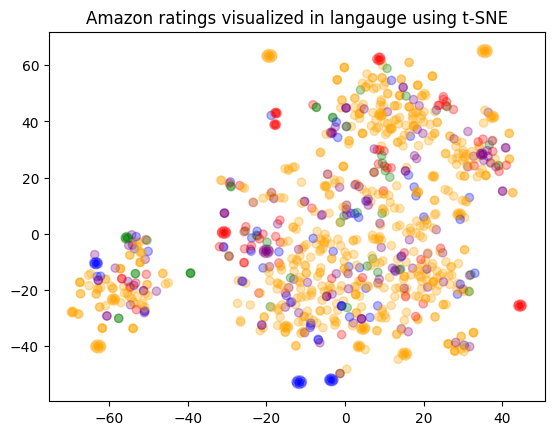

In [56]:
# 创建一个基于预定义颜色的颜色映射对象
color_map = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indics, cmap = color_map, alpha=0.3)

plt.title("Amazon ratings visualized in langauge using t-SNE")

4. 使用K-means聚类，然后使用t-SNE可视化

In [43]:
import numpy as np
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state=60, n_init = 10)
kmeans.fit(matrix)

df_embedded['Cluster'] = kmeans.labels_

In [44]:
df_embedded['Cluster']

0      1
1      1
2      3
3      3
4      0
      ..
995    1
996    0
997    2
998    1
999    2
Name: Cluster, Length: 1000, dtype: int32

In [57]:
df_embedded.head(2)

Time   ProductId          UserId  Score  \
0  1351123200  B003XPF9BO  A3R7JR3FMEBXQB      5   
1  1351123200  B003JK537S  A3JBPC3WFUT5ZP      1   

                                                      Summary  \
0  where does one  start...and stop... with a treat like this   
1                                           Arrived in pieces   

                                                                                                                                                              Text  \
0  Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone   
1                                                      Not pleased at all. When I opened the box, most of the rings were broken in pieces. A total waste of money.   

                                                                                                                                                                                                                                      combined  \
0  Title: where does one  start...and stop... with a treat like this; Contnet: Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone   
1                                                                                               Title: Arrived in pieces; Contnet: Not pleased at all. When I opened the box, most of the rings were broken in pieces. A total waste of money.   

   n_tokens  \
0        53   
1        36   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

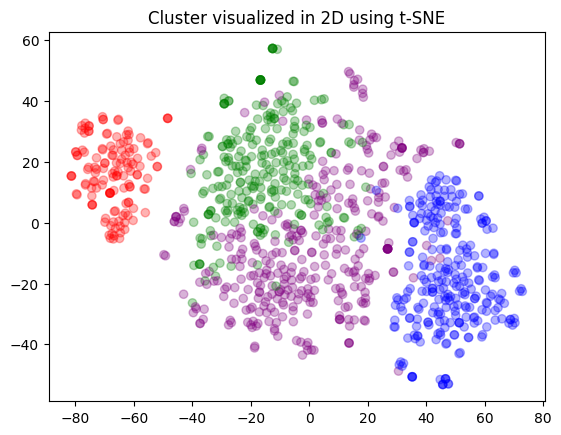

In [69]:
colors = ["red", "green", "blue", "purple"]

tsne_mode = TSNE(n_components=2, random_state=60)
vis_data = tsne_mode.fit_transform(matrix)

x = vis_data[:, 0]
y = vis_data[:, 1]

color_indices = df_embedded['Cluster'].values

color_map = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap = color_map, alpha=0.3)

plt.title("Cluster visualized in 2D using t-SNE")
plt.show()

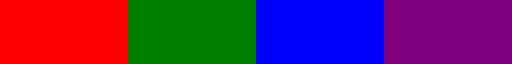

In [68]:
color_map

5. 使用embedding 进行文本搜索

In [70]:
# 定义函数计算两个嵌入向量之间的余弦相似度
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2)/(np.linalg.norm(vec1) * np.linalg.norm(vec2))

type(df_embedded['embedding_vec'][0])

list

In [87]:
# 定义一个名为 search reviews的函数
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = embeding_text(product_description)
    df['similarity'] = df.embedding_vec.apply(lambda x: cosine_similarity(product_embedding, x))
    
    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .combined.str.replace("Title: ", "")
        .str.replace("; Contnet:", ":")
    )
    
    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results

In [88]:
res = search_reviews(df_embedded, 'delicious beans', n = 3)

Good Buy: I liked the beans. They were vacuum sealed, plump and moist. Would recommend them for any use. I personally split and stuck them in some vodka to make vanilla extract. Yum!

Jamaican Blue beans: Excellent coffee bean for roasting. Our family just purchased another 5 pounds for more roasting. Plenty of flavor and mild on acidity when roasted to a dark brown bean and before

Delicious!: I enjoy this white beans seasoning, it gives a rich flavor to the beans I just love it, my mother in law didn't know about this Zatarain's brand and now she is traying different seasoning 



In [89]:
res = search_reviews(df_embedded, "dog food")

Healthy Dog Food: This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.

Doggy snacks: My dog loves these snacks. However they are made in China and as far as I am concerned, suspect!!!! I found an abundance of American made ,human grade chicken dog snacks. Just Google for

Great food!: I wanted a food for a a dog with skin problems. His skin greatly improved with the switch, though he still itches some.  He loves the food. No recalls, American made with American ingredi



In [90]:
res = search_reviews(df_embedded, "awful", n = 5)

God Awful: As a dabbler who enjoys spanning the entire spectrum of taste, I am more than willing to try anything once.  Both as a food aficionado and a lover of bacon, I just had to pick this up.  One

Disappointed: The metal cover has severely disformed. And most of the cookies inside have been crushed into small pieces. Shopping experience is awful. I'll never buy it online again.

Just Bad: Watery and unpleasant.  Like Yoohoo mixed with dirty dish water.  I find it quite odd that Keurig would release a product like this.  I'm sure they can come up with a decent hot chocolate an

Arrived in pieces: Not pleased at all. When I opened the box, most of the rings were broken in pieces. A total waste of money.

Awesome: They arrived before the expected time and were of fantastic quality. Would recommend to any one looking for a awesome treat

